In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix ,confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [64]:
df = pd.read_csv("data.csv")
df.head()


,age,sex,cp,rbp,chol,fbs,recg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Data Types

In [65]:
df.dtypes

age          int64
sex          int64
cp           int64
rbp          int64
chol         int64
fbs          int64
recg         int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
target       int64
dtype: object

In [66]:
df.head()

,age,sex,cp,rbp,chol,fbs,recg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Standardization of Datase

In [67]:
from sklearn.preprocessing import StandardScaler
Xn = df[['age','sex','cp','rbp','chol','fbs','recg','thalach','exang','oldpeak','slope']]
scaler = StandardScaler()
X = scaler.fit_transform(Xn)
Y = df.target


# Output types

In [68]:
No = Y.unique()
print("Unique",No)
Y_total = Y.count()
Y_true = Y.sum()

Y_false = Y_total - Y_true
print("Positive Value = ", Y_true,", i.e :",round((Y_true/Y_total)*100,2),"%")
print("False Value = ", Y_false,", i.e :",100-round((Y_true/Y_total)*100,2),"%")


Unique [0 1]
Positive Value =  629 , i.e : 52.86 %
False Value =  561 , i.e : 47.14 %


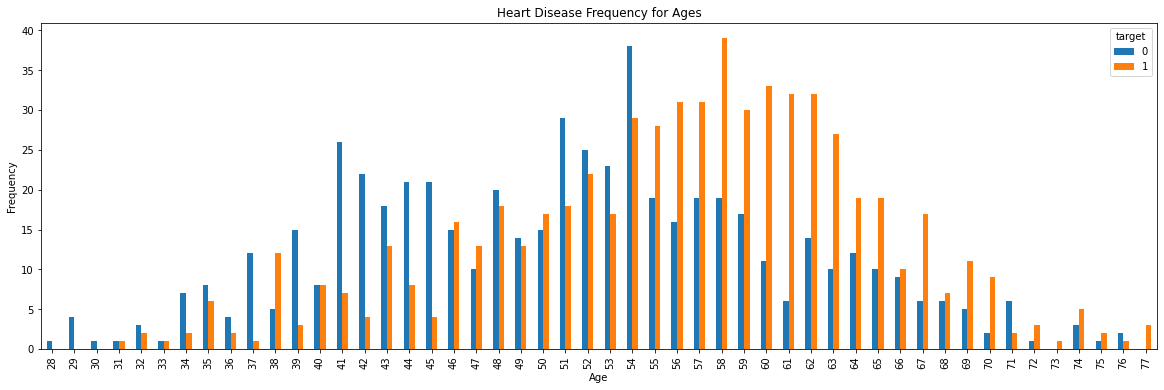

In [69]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

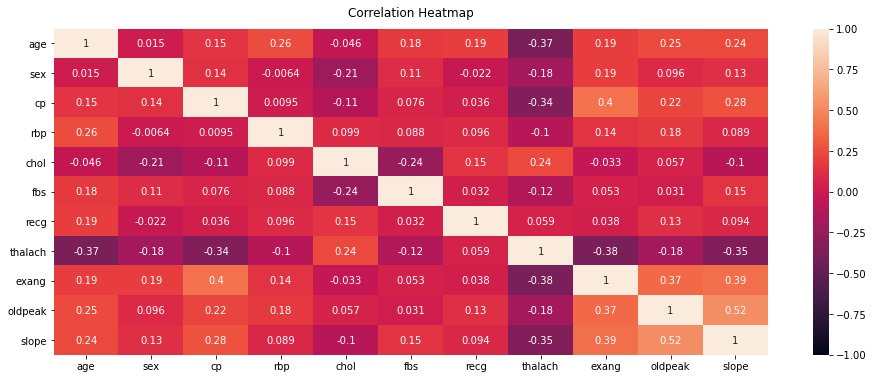

In [70]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Xn.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Features Correlating with Target')

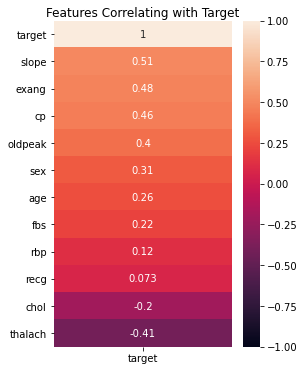

In [71]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':12}, pad=4)

# Description of Dataset

# Train Test Split of the dataset

In [112]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [113]:
totalAccuracy = []
totalPrecision = []
totalRecall = []
totalFscore = []

# RANDOM FOREST CLASSIFIER
##  1. Trianing without tunning of parameters 


In [114]:
model_RFC = RandomForestClassifier(criterion='entropy')

model_RFC.fit(X_train,Y_train)
Y_pred = model_RFC.predict(X_test)

accuracy_RF = model_RFC.score(X_test,Y_test)
precisionRF = precision_score(Y_test,Y_pred)
recallRF = recall_score(Y_test,Y_pred)
fScoreRF = f1_score(Y_test,Y_pred)

print('Accuracy: ',accuracy_RF*100)
print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))

Accuracy:  92.71708683473389
Precsion:  93.17
Recall:  94.09
F Score:  93.63


## 2. Hypertuning of RandonForestClassifier

In [115]:
model = RandomForestClassifier(criterion='gini')
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % ((grid_result.best_score_)*100, grid_result.best_params_))

Best: 91.118761 using {'max_features': 'sqrt', 'n_estimators': 1000}


## 3. Training and Testing Model

In [116]:
model_RFC = RandomForestClassifier(n_estimators=1000,max_features='sqrt',criterion='gini',n_jobs=-1)

model_RFC.fit(X_train,Y_train)
accuracy_RF = model_RFC.score(X_test,Y_test)

print('Accuracy: ',accuracy_RF*100)
Y_pred = model_RFC.predict(X_test)

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionRF = precision_score(Y_test,Y_pred)
recallRF = recall_score(Y_test,Y_pred)
fScoreRF = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_RF)
totalPrecision.append(precisionRF)
totalRecall.append(recallRF)
totalFscore.append(fScoreRF)

print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))

print("Confusion Matrix: \n",conMatrix)


Accuracy:  93.55742296918767
Precsion:  94.12
Recall:  94.58
F Score:  94.35
Confusion Matrix: 
 [[142  12]
 [ 11 192]]


Accuracy:  92.99719887955182
Precsion:  94.06
Recall:  93.6
F Score:  93.83


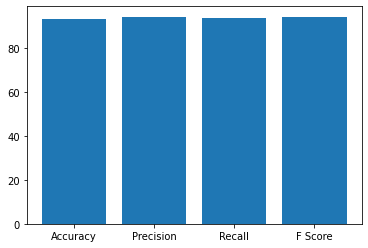

In [78]:
print('Accuracy: ',accuracy_RF*100)
print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))
y_label = [accuracy_RF*100, precisionRF*100,recallRF*100,fScoreRF*100]
x_label = ['Accuracy','Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

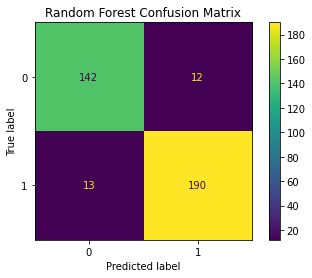

In [79]:
plot_confusion_matrix(model_RFC, X_test, Y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# K-Nearest Neighbors
## 1. Training without tunning of parameters

In [80]:

model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train,Y_train)
accuracy_KNN = model_KNN.score(X_test,Y_test)
print('Accuracy: ',accuracy_KNN*100,"\n")
Y_pred = model_KNN.predict(X_test)


precisionKNN = precision_score(Y_test,Y_pred)
recallKNN = recall_score(Y_test,Y_pred)
fScoreKNN = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionKNN*100,2))
print("Recall: ",round(recallKNN*100,2))
print("F Score: ",round(fScoreKNN*100,2))


Accuracy:  87.95518207282913 

Precsion:  87.38
Recall:  92.12
F Score:  89.69


## 2. Hyperparameter tuning of K-Nearsest Neighbor

In [117]:
model = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.912005 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


## 3. Training and Testing Model

In [134]:

model_KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=15,weights='distance',n_jobs=-1)

model_KNN.fit(X_train,Y_train)
accuracy_KNN = model_KNN.score(X_test,Y_test)
print('Accuracy: ',accuracy_KNN*100,"\n")
Y_pred = model_KNN.predict(X_test)

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionKNN = precision_score(Y_test,Y_pred)
recallKNN = recall_score(Y_test,Y_pred)
fScoreKNN = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_KNN)
totalPrecision.append(precisionKNN)
totalRecall.append(recallKNN)
totalFscore.append(fScoreKNN)

print("Precsion: ",round(precisionKNN*100,2))
print("Recall: ",round(recallKNN*100,2))
print("F Score: ",round(fScoreKNN*100,2))

print("Confusion Matrix: \n",conMatrix)

Accuracy:  92.71708683473389 

Precsion:  92.75
Recall:  94.58
F Score:  93.66
Confusion Matrix: 
 [[139  15]
 [ 11 192]]


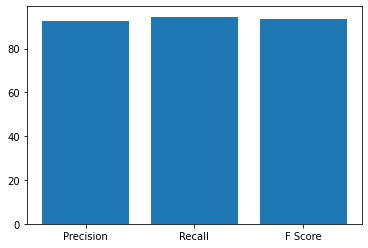

In [83]:

y_label = [precisionKNN*100,recallKNN*100,fScoreKNN*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

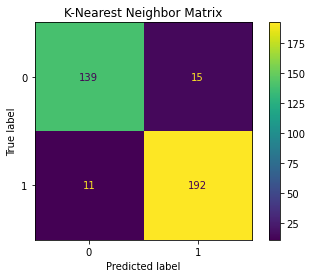

In [84]:

plot_confusion_matrix(model_KNN, X_test, Y_test)
plt.title("K-Nearest Neighbor Matrix")
plt.show()

# Naive Bayes
## 1. Training without tuning of parameters

In [85]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, Y_train)

Y_pred = model_GNB.predict(X_test)
accuracy_GNB = model_GNB.score(X_test,Y_test)
print('Accuracy: ',accuracy_GNB*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGNB = precision_score(Y_test,Y_pred)
recallGNB = recall_score(Y_test,Y_pred)
fScoreGNB = f1_score(Y_test,Y_pred)


print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))

Accuracy:  85.71428571428571 

Precsion:  86.89
Recall:  88.18
F Score:  87.53


## 2. Hypertuning of Gaussian Naive Bayes

In [86]:

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     verbose=1, 
                     cv=cv,
                     scoring='accuracy')


gs_NB.fit(X_train,Y_train)
print("Best: %f using %s" % (gs_NB.best_score_, gs_NB.best_params_))

Fitting 40 folds for each of 100 candidates, totalling 4000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.830422 using {'var_smoothing': 0.2848035868435802}
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    9.4s finished


## 3. Training and Testing Model

In [119]:

model_GNB = GaussianNB(var_smoothing=0.2848035868435802)
model_GNB.fit(X_train, Y_train)

Y_pred = model_GNB.predict(X_test)
accuracy_GNB = model_GNB.score(X_test,Y_test)
print('Accuracy: ',accuracy_GNB*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGNB = precision_score(Y_test,Y_pred)
recallGNB = recall_score(Y_test,Y_pred)
fScoreGNB = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_GNB)
totalPrecision.append(precisionGNB)
totalRecall.append(recallGNB)
totalFscore.append(fScoreGNB)

print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))

print("Confusion Matrix: \n",conMatrix)

Accuracy:  85.71428571428571 

Precsion:  87.62
Recall:  87.19
F Score:  87.41
Confusion Matrix: 
 [[129  25]
 [ 26 177]]


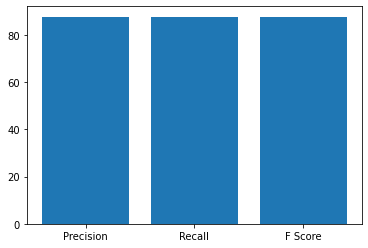

In [88]:
y_label = [precisionGNB*100,recallGNB*100,fScoreGNB*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

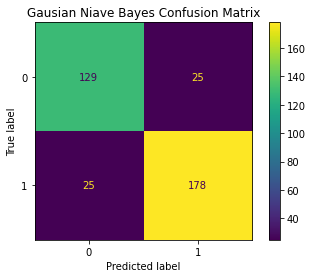

In [89]:
plot_confusion_matrix(model_GNB, X_test, Y_test)
plt.title("Gausian Niave Bayes Confusion Matrix")
plt.show()

# Decision Tree
## 1. Training without tuning of parameters

In [90]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)

Y_pred = model_DTC.predict(X_test)
accuracy_DTC = model_DTC.score(X_test,Y_test)
print('Accuracy: ',accuracy_DTC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionDTC = precision_score(Y_test,Y_pred)
recallDTC = recall_score(Y_test,Y_pred)
fScoreDTC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionDTC*100,2))
print("Recall: ",round(recallDTC*100,2))
print("F Score: ",round(fScoreDTC*100,2))

Accuracy:  86.83473389355743 

Precsion:  91.05
Recall:  85.22
F Score:  88.04


## 2. Hyperparameter tuning of Decision Tree

In [91]:
df_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3,4,5,6]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train,Y_train)
# df_classifier.score(X_test,Y_test)
print("Best: %f using %s" % (gs_DT.best_score_, gs_DT.best_params_))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.849986 using {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    2.1s finished


## 3. Training and Testing of Model

In [120]:

model_DTC = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=2)
model_DTC.fit(X_train, Y_train)

Y_pred = model_DTC.predict(X_test)
accuracy_DTC = model_DTC.score(X_test,Y_test)
print('Accuracy: ',accuracy_DTC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionDTC = precision_score(Y_test,Y_pred)
recallDTC = recall_score(Y_test,Y_pred)
fScoreDTC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionDTC*100,2))
print("Recall: ",round(recallDTC*100,2))
print("F Score: ",round(fScoreDTC*100,2))

totalAccuracy.append(accuracy_DTC)
totalPrecision.append(precisionDTC)
totalRecall.append(recallDTC)
totalFscore.append(fScoreDTC)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  87.11484593837535 

Precsion:  87.2
Recall:  90.64
F Score:  88.89
Confusion Matrix: 
 [[127  27]
 [ 19 184]]


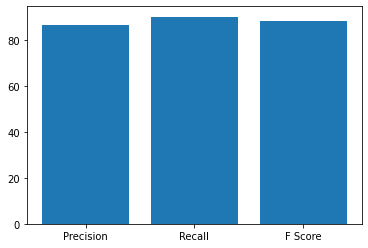

In [93]:

y_label = [precisionDTC*100,recallDTC*100,fScoreDTC*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

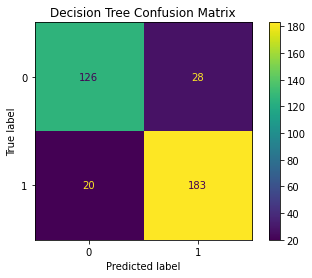

In [94]:
plot_confusion_matrix(model_DTC, X_test, Y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Logistic Regression
## 1. Training wihtout tuning of parameters

In [95]:

model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_test)
accuracy_LR = model_LR.score(X_test,Y_test)
print('Accuracy: ',accuracy_LR*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionLR = precision_score(Y_test,Y_pred)
recallLR = recall_score(Y_test,Y_pred)
fScoreLR = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionLR*100,2))
print("Recall: ",round(recallLR*100,2))
print("F Score: ",round(fScoreLR*100,2))

Accuracy:  85.43417366946778 

Precsion:  86.83
Recall:  87.68
F Score:  87.25


## 2. Hyperparameter tuning of the model

In [96]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.821095 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


## 3. Training and Testing of the Model

In [121]:

model_LR = LogisticRegression(C=1.0,penalty='l2',solver='liblinear')
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_test)
accuracy_LR = model_LR.score(X_test,Y_test)
print('Accuracy: ',accuracy_LR*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionLR = precision_score(Y_test,Y_pred)
recallLR = recall_score(Y_test,Y_pred)
fScoreLR = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionLR*100,2))
print("Recall: ",round(recallLR*100,2))
print("F Score: ",round(fScoreLR*100,2))


totalAccuracy.append(accuracy_LR)
totalPrecision.append(precisionLR)
totalRecall.append(recallLR)
totalFscore.append(fScoreLR)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  85.43417366946778 

Precsion:  86.83
Recall:  87.68
F Score:  87.25
Confusion Matrix: 
 [[127  27]
 [ 25 178]]


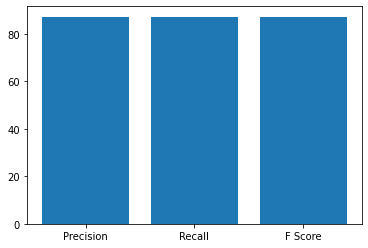

In [98]:
y_label = [precisionLR*100,recallLR*100,fScoreLR*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

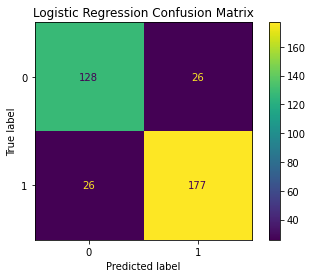

In [99]:
plot_confusion_matrix(model_LR, X_test, Y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [122]:
y_pred_prob_yes=model_LR.predict_proba(X_test)

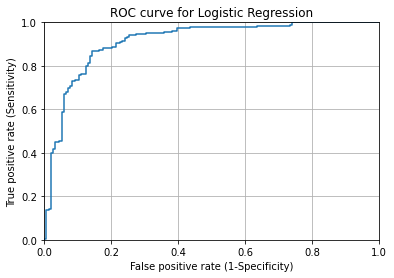

In [123]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr1,tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


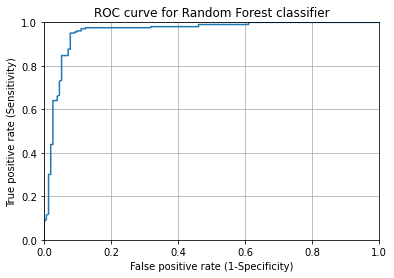

In [124]:
y_pred_prob_yes=model_RFC.predict_proba(X_test)
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr2,tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

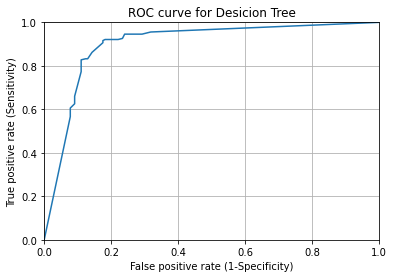

In [125]:
y_pred_prob_yes=model_DTC.predict_proba(X_test)
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr3,tpr3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Desicion Tree')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

Text(0, 0.5, 'True positive rate (Sensitivity)')

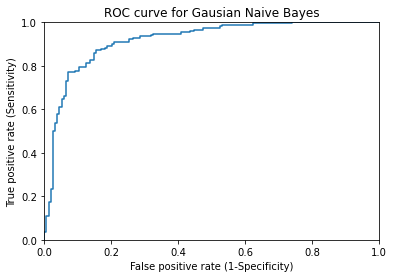

In [126]:
y_pred_prob_yes=model_GNB.predict_proba(X_test)
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr4,tpr4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Gausian Naive Bayes')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')


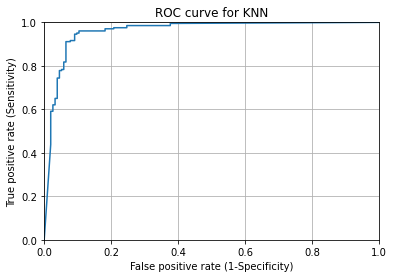

In [127]:
y_pred_prob_yes=model_KNN.predict_proba(X_test)
fpr5, tpr5, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr5,tpr5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

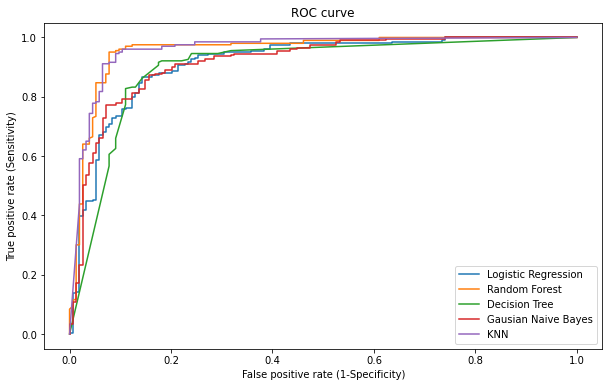

In [128]:
plt.figure(figsize=(10,6))
plt.plot(fpr1,tpr1,label = 'Logistic Regression')
plt.plot(fpr2,tpr2,label = 'Random Forest')
plt.plot(fpr3,tpr3,label = 'Decision Tree')
plt.plot(fpr4,tpr4,label = 'Gausian Naive Bayes')
plt.plot(fpr5,tpr5,label = 'KNN')
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.legend()

Text(0.5, 1.0, 'Logistic Regression')

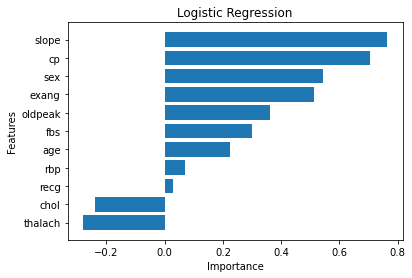

In [129]:
importance = model_LR.coef_[0]	
cols = Xn.columns
f_1 = {cols[i]: importance[i] for i in range(len(cols))}
f_lst = {k: v for k, v in sorted(f_1.items(), key=lambda item: item[1])}
nCols = []
nImportance = []
for i in f_lst.keys():
    nCols.append(i)
for i in f_lst.values():
    nImportance.append(i)
plt.barh(nCols, nImportance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('Logistic Regression')


Text(0.5, 1.0, 'Random Forest')

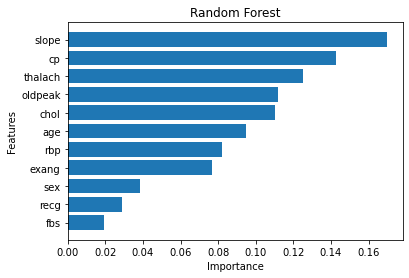

In [108]:
importance = model_RFC.feature_importances_
cols = Xn.columns
f_1 = {cols[i]: importance[i] for i in range(len(cols))}
f_lst = {k: v for k, v in sorted(f_1.items(), key=lambda item: item[1])}
nCols = []
nImportance = []
for i in f_lst.keys():
    nCols.append(i)
for i in f_lst.values():
    nImportance.append(i)
plt.barh(nCols, nImportance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('Random Forest')


Text(0.5, 1.0, 'KNN')

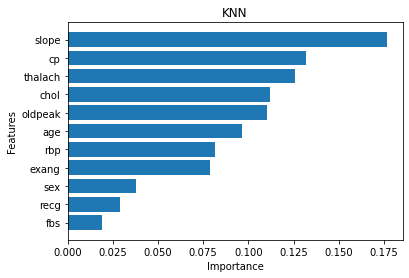

In [130]:
importance = model_RFC.feature_importances_
cols = Xn.columns
f_1 = {cols[i]: importance[i] for i in range(len(cols))}
f_lst = {k: v for k, v in sorted(f_1.items(), key=lambda item: item[1])}
nCols = []
nImportance = []
for i in f_lst.keys():
    nCols.append(i)
for i in f_lst.values():
    nImportance.append(i)
plt.barh(nCols, nImportance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('KNN')


Text(0.5, 1.0, 'Desicion Tree')

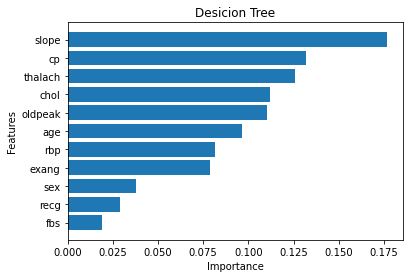

In [131]:
importance = model_RFC.feature_importances_
cols = Xn.columns
f_1 = {cols[i]: importance[i] for i in range(len(cols))}
f_lst = {k: v for k, v in sorted(f_1.items(), key=lambda item: item[1])}
nCols = []
nImportance = []
for i in f_lst.keys():
    nCols.append(i)
for i in f_lst.values():
    nImportance.append(i)
plt.barh(nCols, nImportance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('Desicion Tree')


In [105]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(model_GNB, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. chol (0.095238)
2. thalach (0.025210)
3. rbp (0.007283)
4. age (0.003922)
5. slope (0.000000)
6. oldpeak (0.000000)
7. exang (0.000000)
8. recg (0.000000)
9. fbs (0.000000)
10. cp (0.000000)
11. sex (0.000000)
